# 6.3 Geographical Visualizations

### This script contains the following:
#### 1. Import data and libraries
#### 2. Data cleaning
#### 3. Data wrangling
#### 4. Plotting a choropleth

## 1. Import data and libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import os
import folium
import json
import warnings
warnings.filterwarnings("ignore")

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

In [3]:
# Import ".json" file

country_geo = r'/Users/giadairene/Downloads/world-countries.json'

In [4]:
# Look at the JSON file contents

f = open(r'/Users/giadairene/Downloads/world-countries.json')
  
# returns JSON object asa dictionary

data = json.load(f)
  
# Iterating through the json list

for i in data['features']:
    print(i)

{'type': 'Feature', 'properties': {'name': 'Afghanistan'}, 'geometry': {'type': 'Polygon', 'coordinates': [[[61.210817, 35.650072], [62.230651, 35.270664], [62.984662, 35.404041], [63.193538, 35.857166], [63.982896, 36.007957], [64.546479, 36.312073], [64.746105, 37.111818], [65.588948, 37.305217], [65.745631, 37.661164], [66.217385, 37.39379], [66.518607, 37.362784], [67.075782, 37.356144], [67.83, 37.144994], [68.135562, 37.023115], [68.859446, 37.344336], [69.196273, 37.151144], [69.518785, 37.608997], [70.116578, 37.588223], [70.270574, 37.735165], [70.376304, 38.138396], [70.806821, 38.486282], [71.348131, 38.258905], [71.239404, 37.953265], [71.541918, 37.905774], [71.448693, 37.065645], [71.844638, 36.738171], [72.193041, 36.948288], [72.63689, 37.047558], [73.260056, 37.495257], [73.948696, 37.421566], [74.980002, 37.41999], [75.158028, 37.133031], [74.575893, 37.020841], [74.067552, 36.836176], [72.920025, 36.720007], [71.846292, 36.509942], [71.262348, 36.074388], [71.498768,

In [5]:
# Define path

path = r'/Users/giadairene/Documents/CareerFoundry Data Analytics/Data Analytics Immersion/Achievement 6/World_Happiness_Analysis'

In [6]:
# Import world happiness data

df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Happiness_combined_all_years.csv'), index_col = 0)

In [7]:
df.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [8]:
df.shape

(741, 11)

## 2. Data cleaning

##### Missing values check

In [9]:
# Check for missing values

df.isnull().sum()

Country                  0
Region                   0
Year                     0
Happiness_rank           0
Happiness_score          0
GDP_capita               0
Social_support           0
Life_expectancy          1
Freedom                  0
Generosity               0
Corruption_perception    0
dtype: int64

In [10]:
# Impute missing values with median

df['Life_expectancy'].fillna(df['Life_expectancy'].median(), inplace=True)

In [11]:
# Last check for NaN

df.isnull().sum()

Country                  0
Region                   0
Year                     0
Happiness_rank           0
Happiness_score          0
GDP_capita               0
Social_support           0
Life_expectancy          0
Freedom                  0
Generosity               0
Corruption_perception    0
dtype: int64

##### Duplicates check

In [12]:
dups = df.duplicated()

In [13]:
dups.shape # no dups

(741,)

##### Extreme values checks

<Axes: xlabel='Happiness_rank', ylabel='Count'>

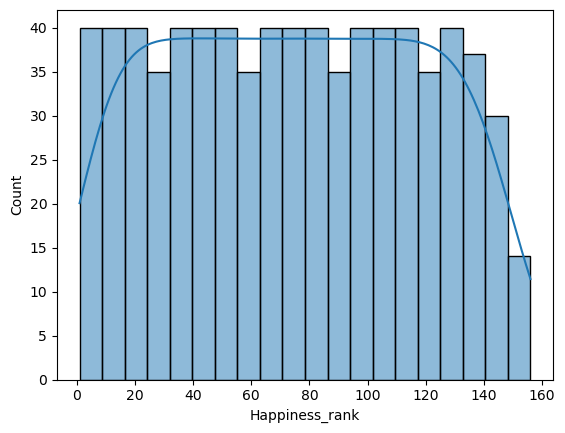

In [14]:
sns.histplot(df['Happiness_rank'], bins=20, kde = True) # no extreme values

<Axes: xlabel='Happiness_score', ylabel='Count'>

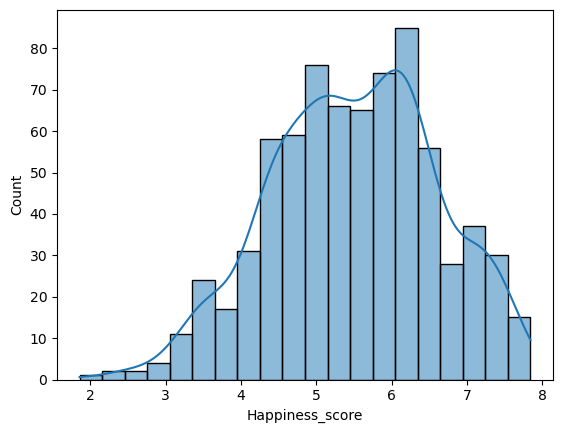

In [15]:
sns.histplot(df['Happiness_score'], bins=20, kde = True) # no extreme values

<Axes: xlabel='GDP_capita', ylabel='Count'>

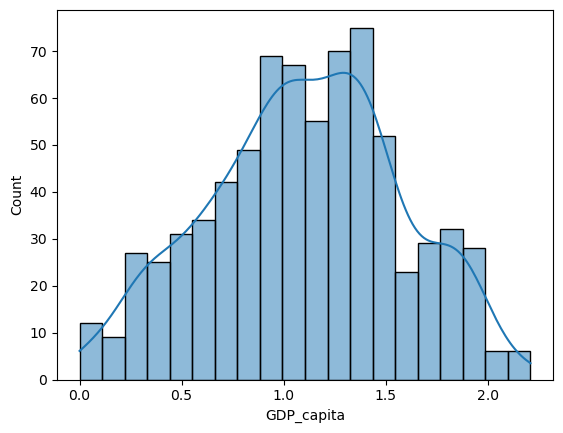

In [16]:
sns.histplot(df['GDP_capita'], bins=20, kde = True)  # shows extreme values for 'GDP_capita'

In [17]:
# Select only entries with a non-zero GDP per capita

df = df[df['GDP_capita'] > 0]

In [18]:
df.shape

(736, 11)

<Axes: xlabel='Social_support', ylabel='Count'>

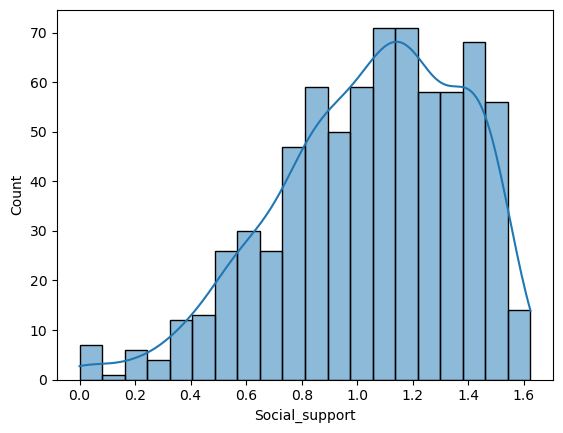

In [19]:
sns.histplot(df['Social_support'], bins=20, kde = True)  # shows extreme values for 'Social_support'

In [20]:
# Select only entries with a non-zero Social support

df = df[df['Social_support'] > 0]

In [21]:
df.shape

(731, 11)

<Axes: xlabel='Life_expectancy', ylabel='Count'>

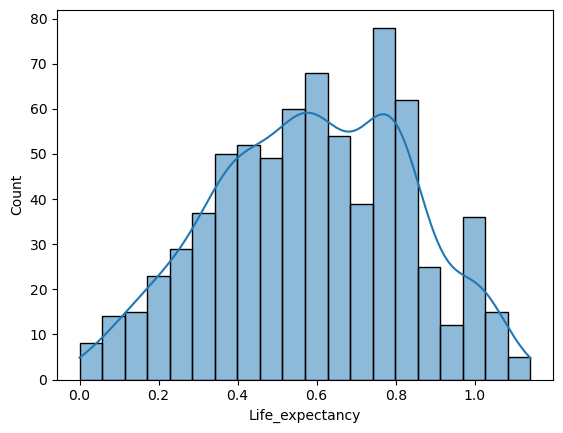

In [22]:
sns.histplot(df['Life_expectancy'], bins=20, kde = True)  # shows extreme values for 'Life_expectancy'

In [23]:
# Select only entries with a non-zero Life expectancy

df = df[df['Life_expectancy'] > 0]

In [24]:
df.shape

(727, 11)

<Axes: xlabel='Freedom', ylabel='Count'>

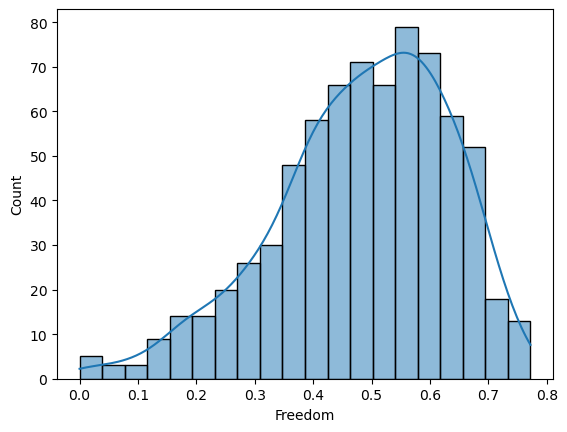

In [25]:
sns.histplot(df['Freedom'], bins=20, kde = True)  # shows extreme values for 'Freedom'

In [26]:
# Select only entries with a non-zero Freedom

df = df[df['Freedom'] > 0]

In [27]:
df.shape

(725, 11)

<Axes: xlabel='Generosity', ylabel='Count'>

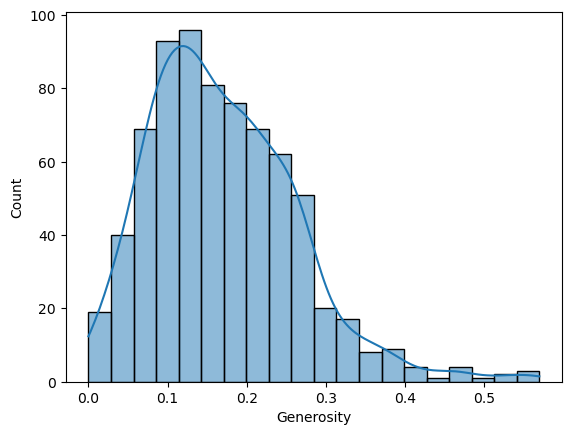

In [28]:
sns.histplot(df['Generosity'], bins=20, kde = True)  # shows extreme values for 'Generosity'

In [29]:
# Select only entries with a non-zero Generosity

df = df[df['Generosity'] > 0]

In [30]:
df.shape

(720, 11)

<Axes: xlabel='Corruption_perception', ylabel='Count'>

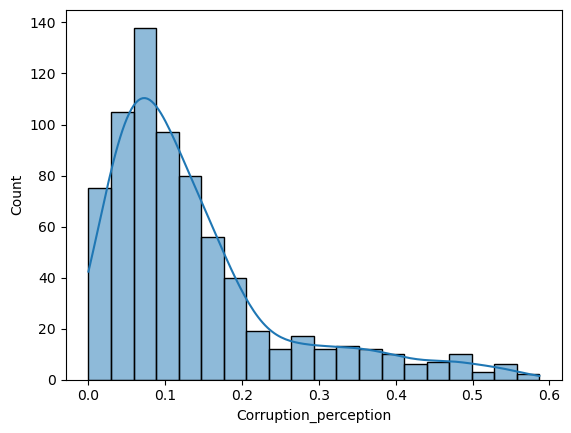

In [31]:
sns.histplot(df['Corruption_perception'], bins=20, kde = True)  # shows extreme values for 'Corruption_perception'

In [32]:
# Select only entries with a non-zero Corruption perception

df = df[df['Corruption_perception'] > 0]

In [33]:
df.shape

(715, 11)

In [34]:
df.dtypes

Country                   object
Region                    object
Year                       int64
Happiness_rank             int64
Happiness_score          float64
GDP_capita               float64
Social_support           float64
Life_expectancy          float64
Freedom                  float64
Generosity               float64
Corruption_perception    float64
dtype: object

## 3. Data wrangling

In [35]:
# Mapping dictionary for inconsistent country names

country_name_mapping = {
    'Trinidad & Tobago': 'Trinidad and Tobago',
    'Hong Kong S.A.R. of China': 'Hong Kong',
    'Congo (Brazzaville)': 'Congo',
    'Congo (Kinshasa)': 'Democratic Republic of the Congo',
    'North Macedonia': 'Macedonia',
    'Serbia': 'Republic of Serbia',
    'Taiwan Province of China': 'Taiwan',
    'Tanzania': 'United Republic of Tanzania',
    'United States': 'United States of America',
}

In [36]:
# Apply the mapping to the 'Country' column

df['Country'] = df['Country'].replace(country_name_mapping)

In [37]:
df.shape

(715, 11)

In [39]:
# Calculate the average happiness score for each country across all years

avg_happiness = df.groupby('Country')['Happiness_score'].mean().reset_index()

In [40]:
# Rename the column for clarity

avg_happiness.rename(columns={'Happiness_score': 'Average_happiness_score'}, inplace=True)

In [41]:
avg_happiness.head()

,Country,Average_happiness_score
0,Albania,5.03894
1,Algeria,5.11082
2,Argentina,5.99614
3,Armenia,5.05196
4,Australia,7.17816


In [42]:
avg_happiness.shape

(154, 2)

In [43]:
# Export the new dataset

avg_happiness.to_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Average_happiness_all_years.csv'))

In [44]:
# Merge the average happiness scores back into the original DataFrame

merged_df = df.merge(avg_happiness, on='Country', how='left')

In [45]:
merged_df.head()

,Country,Region,Year,Happiness_rank,Happiness_score,GDP_capita,Social_support,Life_expectancy,Freedom,Generosity,Corruption_perception,Average_happiness_score
0,Finland,Western Europe,2019,1,7.769,1.340,1.587,0.986,0.596,0.153,0.393,7.80894
1,Denmark,Western Europe,2019,2,7.600,1.383,1.573,0.996,0.592,0.252,0.410,7.61752
2,Norway,Western Europe,2019,3,7.554,1.488,1.582,1.028,0.603,0.271,0.341,7.42280
3,Iceland,Western Europe,2019,4,7.494,1.380,1.624,1.026,0.591,0.354,0.118,7.52790
4,Netherlands,Western Europe,2019,5,7.488,1.396,1.522,0.999,0.557,0.322,0.298,7.44378


In [46]:
merged_df.shape

(715, 12)

In [48]:
pd.set_option('display.max_rows', None)

In [49]:
avg_happiness['Country']

0                               Albania
1                               Algeria
2                             Argentina
3                               Armenia
4                             Australia
5                               Austria
6                            Azerbaijan
7                               Bahrain
8                            Bangladesh
9                               Belarus
10                              Belgium
11                                Benin
12                               Bhutan
13                              Bolivia
14               Bosnia and Herzegovina
15                             Botswana
16                               Brazil
17                             Bulgaria
18                         Burkina Faso
19                              Burundi
20                             Cambodia
21                             Cameroon
22                               Canada
23                                 Chad
24                                Chile


## 4. Plotting a choropleth

In [50]:
# Setup a folium map at a high-level zoom

map = folium.Map(location = [100, 0], zoom_start = 1.5)

# Choropleth maps bind Pandas Data Frames and json geometries. This allows us to quickly visualize data combinations

folium.Choropleth(
    geo_data = country_geo, 
    data = avg_happiness,
    columns = ['Country', 'Average_happiness_score'],
    key_on = 'feature.properties.name',
    fill_color = 'YlOrBr', fill_opacity=0.6, line_opacity=0.1,
    nan_fill_color = 'white',
    legend_name = "Avg Happiness Score").add_to(map)
folium.LayerControl().add_to(map)

map

In [51]:
map.save('Average_Happiness_Score.html')

### Observations:
* I expected to see some gradient of color for more African countries (like Angola, Central African Republic, Sudan, and Somalia), which are instead white (= missing).
* The map highlights a clear divide in happiness scores between developed and developing countries. Developed countries are generally characterized by higher happiness scores, as indicated by the darker shades of orange and brown. For instance, countries in Western Europe (like Finland, Denmark, and Norway), North America (like Canada), and Oceania (like Australia and New Zealand) show higher average happiness scores. Developing countries tend to have lower happiness scores, illustrated by the lighter shades of yellow and light orange. Many countries in Africa, parts of Asia, and South America fall into this category. There are fewer dark-shaded countries in these regions, indicating lower average happiness scores.
* The distribution of happiness scores varies significantly across different regions, with Western Europe, North America, and Oceania generally showing higher scores, while regions like Africa, parts of Asia, and South America tend to have lower scores.

### Further questions to explore:
* What specific factors contribute most significantly to the differences in happiness scores between developed and developing countries?
* Are there any developing countries showing a constant increase in happiness scores over time?